#### Name - Wanshika W.A.R.
#### Index No. - 1900663R
#### EN2550 Assignment 01 on Intensity Transformations and Neighborhood Filtering

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

(01)

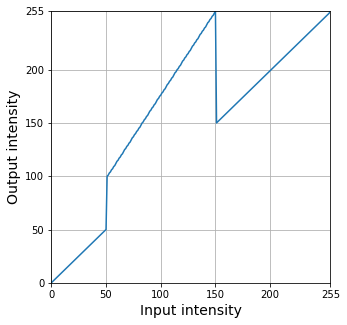

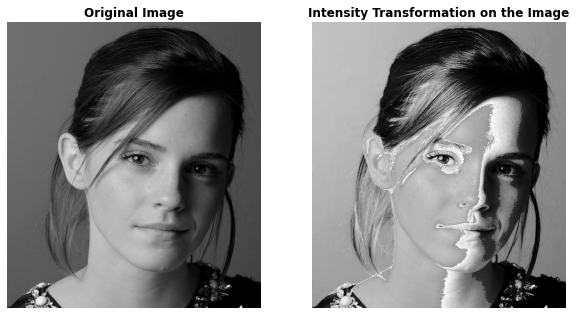

In [2]:
im = cv.imread(r"E:\#####ACCA folders\acca 4 th sem\Fundamentals of Image Processing and Machine Vision\Assinment 01\emma_gray.jpg")
assert im is not None

t1 = np.linspace(0,50,51)
t2 = np.linspace(100,255,100)
t3 = np.linspace(150,255,105)
label = [0, 50, 100,150, 200,255]

t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
plt.figure(figsize = (5,5))
plt.plot(t)
plt.grid('on')
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.xticks(label)
plt.yticks(label)
plt.xlabel('Input intensity', fontsize = 14)
plt.ylabel('Output intensity', fontsize = 14)

assert len(t) == 256
g = cv.LUT(im,t)

cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', im)
cv.waitKey(0)
cv.imshow('Image', g)
cv.waitKey(0)
cv.destroyAllWindows()

fig, ax = plt.subplots(1,2,figsize = (10,10))
ax[0].imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image',fontweight ="bold",fontsize = 12)
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB))
ax[1].set_title('Intensity Transformation on the Image',fontweight ="bold",fontsize = 12)
ax[1].axis('off')

plt.show()

(02)

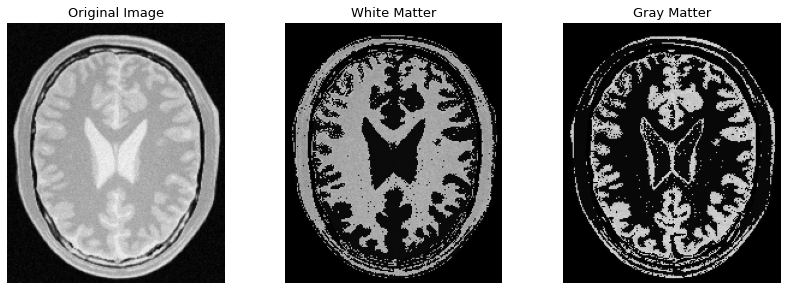

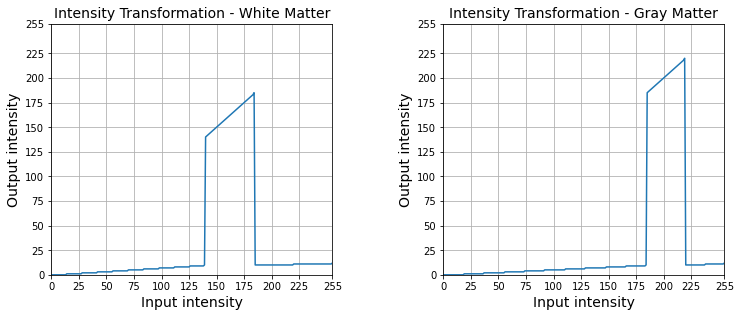

In [3]:
im = cv.imread(r"E:\#####ACCA folders\acca 4 th sem\Fundamentals of Image Processing and Machine Vision\Assinment 01\brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)
assert im is not None

t1 = np.linspace(0, 10, 140)
t2 = np.linspace(140, 185, 45)
t3 = np.linspace(10, 12, 71)

z1 = np.linspace(0, 10, 185)
z2 = np.linspace(185, 220, 35)
z3 = np.linspace(10, 12, 36)

label = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 255]

t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
z = np.concatenate((z1, z2, z3), axis = 0).astype(np.uint8)

assert len(t) == 256
assert len(z) == 256
g = cv.LUT(im,t)
h = cv.LUT(im,z)

cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', im)
cv.waitKey(0)
cv.imshow('Image', g)
cv.waitKey(0)
cv.imshow('Image', h)
cv.waitKey(0)
cv.destroyAllWindows()

fig, ax = plt.subplots(1,3,figsize = (12,12))
fig.tight_layout(pad =3.0)

ax[0].imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image', fontsize = 13)
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(g,cv.COLOR_BGR2RGB))
ax[1].set_title('White Matter', fontsize = 13)
ax[1].axis('off')

ax[2].imshow(cv.cvtColor(h,cv.COLOR_BGR2RGB))
ax[2].set_title('Gray Matter', fontsize = 13)
ax[2].axis('off')

fig, ax = plt.subplots(1,2,figsize = (12,6 ))
fig.tight_layout(pad =8.0)

ax[0].plot(t)
ax[0].set_title('Intensity Transformation - White Matter', fontsize = 14)
ax[0].grid('on')
ax[0].set_xlim([0, 255])
ax[0].set_ylim([0, 255])
ax[0].set_xticks(label)
ax[0].set_yticks(label)
ax[0].set_xlabel('Input intensity', fontsize = 14)
ax[0].set_ylabel('Output intensity', fontsize = 14)

ax[1].plot(z)
ax[1].set_title('Intensity Transformation - Gray Matter', fontsize = 14)
ax[1].grid('on')
ax[1].set_xlim([0, 255])
ax[1].set_ylim([0, 255])
ax[1].set_xticks(label)
ax[1].set_yticks(label)
ax[1].set_xlabel('Input intensity', fontsize = 14)
ax[1].set_ylabel('Output intensity', fontsize = 14)


plt.show()

(03) - (a)

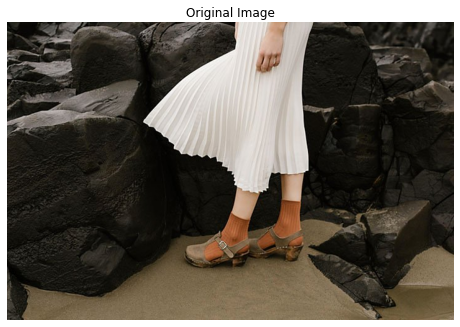

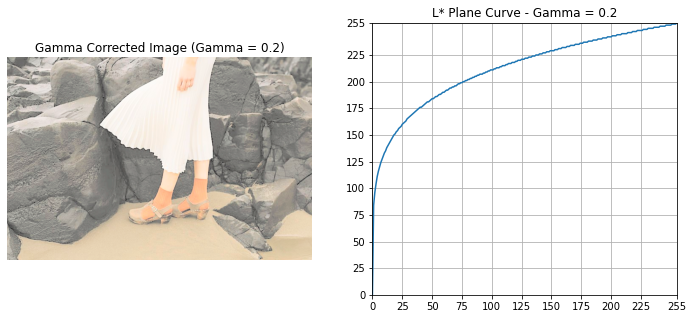

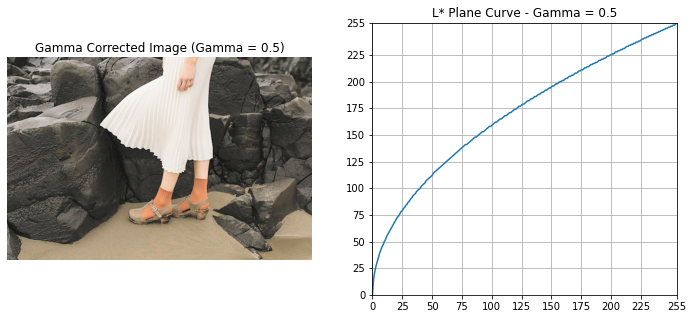

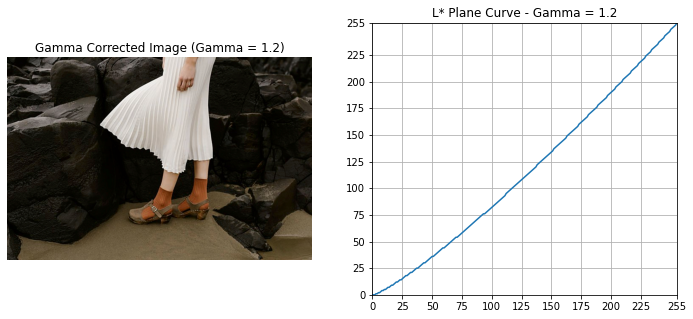

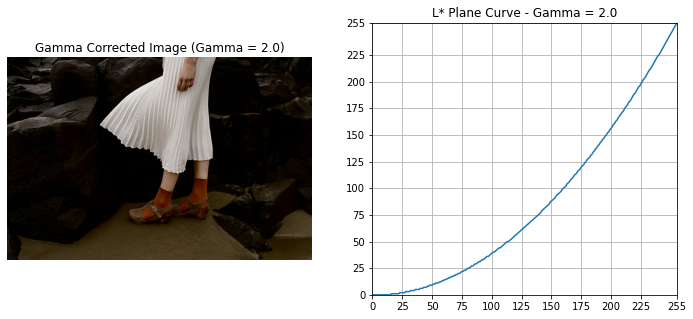

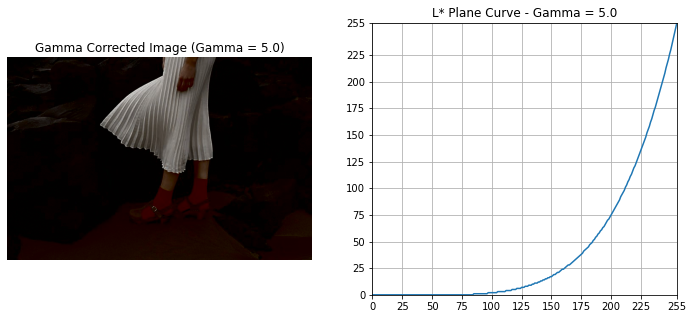

In [4]:
import math

im = cv.imread(r"E:\#####ACCA folders\acca 4 th sem\Fundamentals of Image Processing and Machine Vision\Assinment 01\highlights_and_shadows.jpg")
assert im is not None

lab = cv.cvtColor(im, cv.COLOR_BGR2LAB)
cv.imshow('Image', im)
cv.waitKey(0)
cv.destroyAllWindows()
cv.imshow('Image', lab)
cv.waitKey(0)
cv.destroyAllWindows()

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(cv.cvtColor(im ,cv.COLOR_BGR2RGB))
ax.set_title("Original Image")
ax.axis('off')

L, A, B = cv.split(lab)
##mid = 0.5
##mean = np.mean(L)
##gamma = math.log(mid*255)/math.log(mean)

gamma = [0.2, 0.5, 1.2, 2.0, 5.0]
hist_g = []

for j in gamma:
    lookUpTable = np.array([(p/255)**(j)*255 for p in range(0, 256)]).astype(np.uint8)

    L_G = cv.LUT(L, lookUpTable)

    ##print(gamma)
    ##print(L)
    ##print(L_G)

    lab_gamma = cv.merge([L_G, A, B])
    hist_g.append(cv.calcHist([lab_gamma], [0], None, [256], [0,256]))

    img = cv.cvtColor(lab_gamma, cv.COLOR_LAB2BGR)
            
    cv.imshow('Image', img)
    cv.waitKey(0)
    cv.destroyAllWindows()

    label = [0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 255]

    fig, ax = plt.subplots(1, 2, figsize = (12, 5))
    ax[0].imshow(cv.cvtColor(img ,cv.COLOR_BGR2RGB))
    ax[0].set_title("Gamma Corrected Image (Gamma = " + str(j)+")")
    ax[0].axis('off')

    ax[1].plot(lookUpTable)
    ax[1].set_title("L* Plane Curve - Gamma = " + str(j))
    ax[1].set_xlim([0, 255])
    ax[1].set_ylim([0, 255])
    ax[1].set_xticks(label)
    ax[1].set_yticks(label)
    ax[1].grid("on")
    
    plt.show()

(03) - (b)

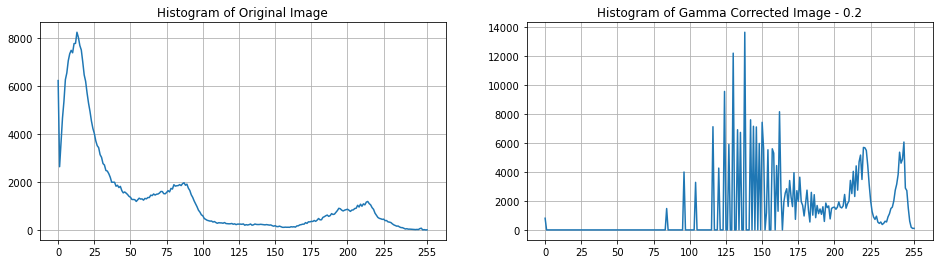

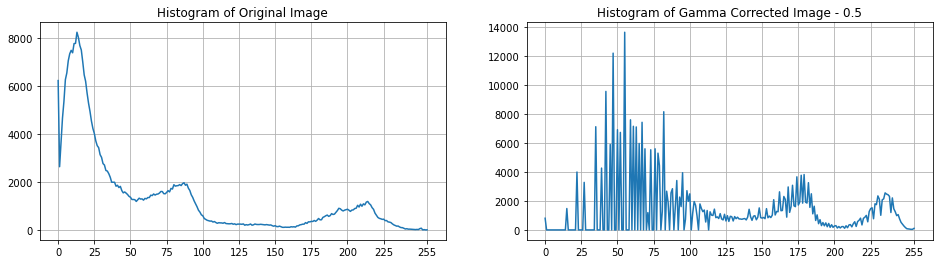

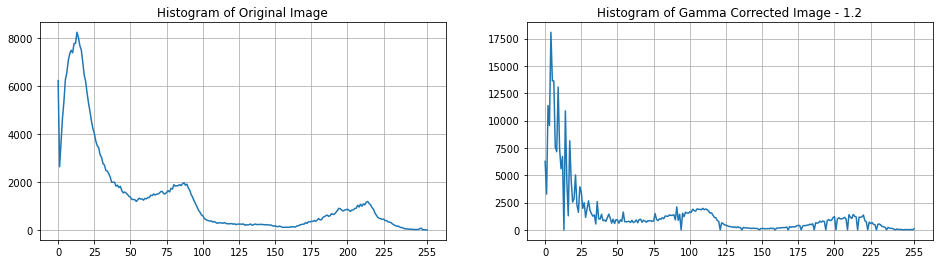

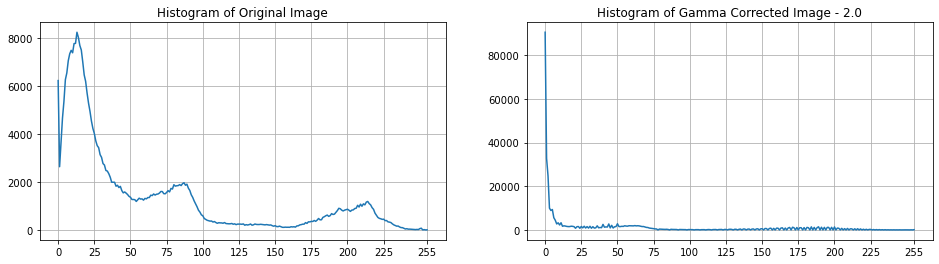

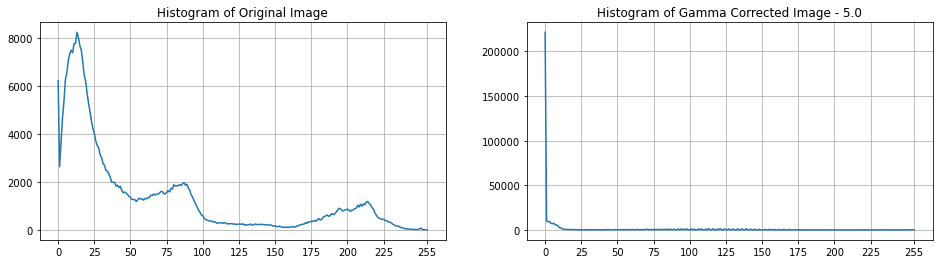

In [5]:
for k in range(len(hist_g)):
    hist_f = cv.calcHist([im], [0], None, [256], [0,256])

    fig, ax = plt.subplots(1, 2, figsize=(16, 4))
    ax[0].plot(hist_f)
    ax[0].set_title("Histogram of Original Image")
    ##ax[0].set_xlim([0, 256])
    ##ax[0].set_ylim([0, 10000])
    ax[0].set_xticks(label)
    ax[0].grid('on')

    ax[1].plot(hist_g[k])
    ax[1].set_title("Histogram of Gamma Corrected Image - " + str(gamma[k]))
    ##ax[1].set_xlim([0,256])
    ##ax[1].set_ylim([0, 40000])
    ax[1].set_xticks(label)
    ax[1].grid('on')

    plt.show()


(04)

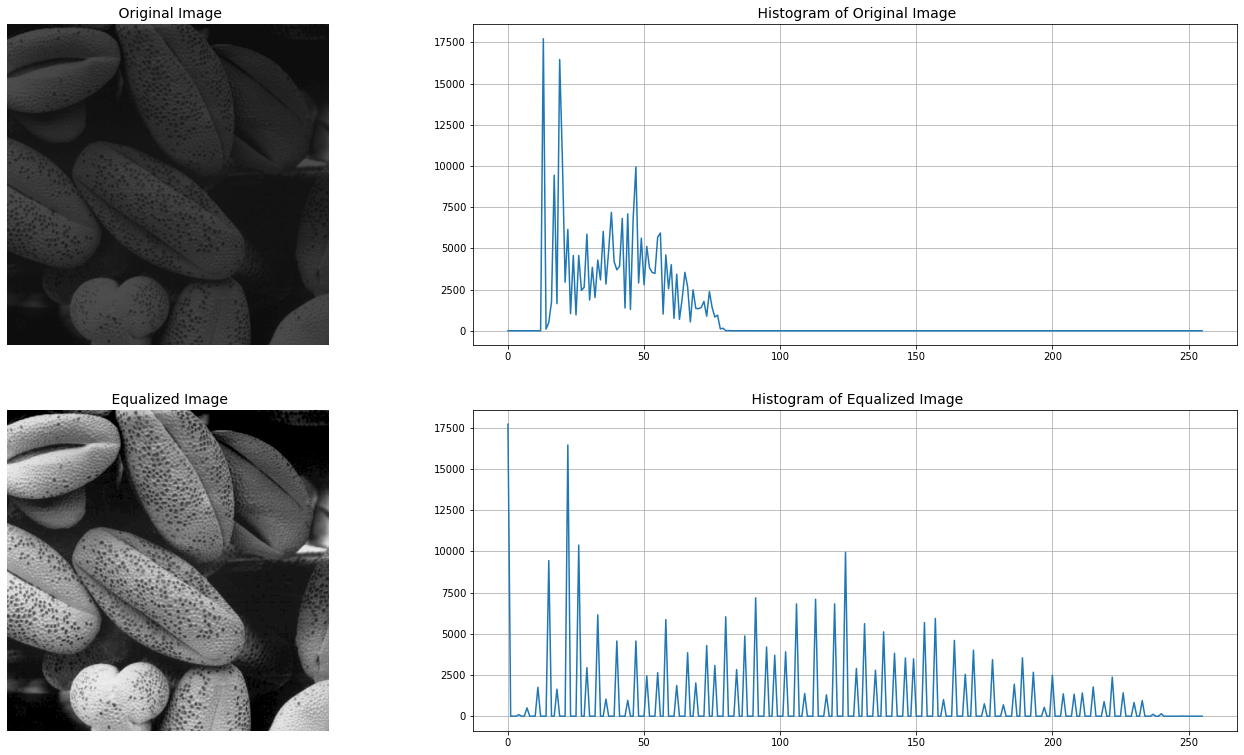

In [6]:
im = cv.imread(r"E:\#####ACCA folders\acca 4 th sem\Fundamentals of Image Processing and Machine Vision\Assinment 01\shells.png", cv.IMREAD_GRAYSCALE)
assert im is not None
ims = im.copy()

high = 0
low = 0

hist = np.zeros(256)
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        for k in range(256):
            if im[i,j] == k:
                hist[k] += 1
                break
                
for i in range(0, 256, 1):
        if (hist[i] != 0):
            low = i
            break
    
for i in range(255, -1, -1):
    if (hist[i] != 0):
        high = i
        break

for i in range(ims.shape[0]):
    for j in range(ims.shape[1]):
        for k in range(high):
            if ims[i,j] == k:
                ims[i,j] = round((k-low)*((255-0)/(high-low)) + 0)
                break

hist_eq = np.zeros(256)
for i in range(ims.shape[0]):
    for j in range(ims.shape[1]):
        for k in range(256):
            if ims[i,j] == k:
                hist_eq[k] += 1
                break

cv.imshow('Image', ims)
cv.waitKey(0)
cv.destroyAllWindows()
    
fig, ax = plt.subplots(2, 2, figsize=(26, 13))
plt.subplots_adjust(wspace = -0.1, hspace = None)

ax[0,0].imshow(cv.cvtColor(im ,cv.COLOR_BGR2RGB))
ax[0,0].set_title(" Original Image", fontsize = 14)
ax[0,0].axis("off")

ax[0,1].plot(hist)
ax[0,1].set_title(" Histogram of Original Image", fontsize = 14)
ax[0,1].grid('on')

ax[1,0].imshow(cv.cvtColor(ims ,cv.COLOR_BGR2RGB))
ax[1,0].set_title(" Equalized Image", fontsize = 14)
ax[1,0].axis("off")

ax[1,1].plot(hist_eq )
ax[1,1].set_title(" Histogram of Equalized Image", fontsize = 14)
ax[1,1].grid('on')

plt.show()

(06) - (a)

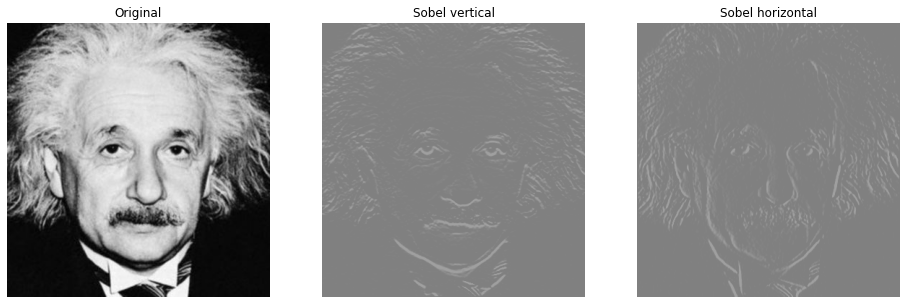

In [3]:
im = cv.imread(r"E:\#####ACCA folders\acca 4 th sem\Fundamentals of Image Processing and Machine Vision\Assinment 01\einstein.png", cv.IMREAD_GRAYSCALE)
assert im is not None

sobel_v = np.array([[-1 , -2, -1] , [0 ,0 , 0] , [1 , 2, 1] ], dtype=np.float32)
f_x = cv.filter2D(im, -1, sobel_v)

sobel_h = np.array([[-1 , 0, 1] , [-2 ,0 , 2] , [-1 , 0, 1] ], dtype=np.float32)
f_h = cv.filter2D(im, -1, sobel_h)

fig, axes = plt.subplots(1, 3, figsize=(16, 16))
axes[0].imshow(im, cmap = 'gray', vmin = 0, vmax = 255)
axes[0].set_title("Original")
axes[0].axis('off')

axes[1].imshow(f_x, cmap = 'gray', vmin = -1020, vmax = 1020)
axes[1].set_title("Sobel vertical")
axes[1].axis('off')

axes[2].imshow(f_h, cmap = 'gray', vmin = -1020, vmax = 1020)
axes[2].set_title("Sobel horizontal")
axes[2].axis('off')

plt.show()

(06) - (b)